## Actividad 3_11

<div style="border-style:groove;border-width:thin;padding:10px">

Trabajamos en una empresa de alquiler de bicicletas en Seul. El departamento de mantenimiento de bicicletas ha pedido a nuestro departamento de DataScience si es posible poder saber, a priori, cuantas bicicletas tiene que haber disponibles porque ellos tienen que ir retirando bicicletas para repararlas. Tenemos los datos que se muestran a continuación. ¿Será posible saber cuantas tienen que tener en circulación?

</div>

In [2]:
import pandas as pd
bicicletas = pd.read_csv("SeoulBikeData.csv", sep=',',encoding='latin-1')
bicicletas.drop(['Date'], axis=1, inplace=True)
bicicletas["Functioning Day"].replace(to_replace="Yes", value=1, inplace=True)
bicicletas["Functioning Day"].replace(to_replace="No", value=0, inplace=True)
bicicletas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   int64  
dtypes: float64(6), int64(5), object(2)
memory usage:

/tmp/ipykernel_20530/571905948.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bicicletas["Functioning Day"].replace(to_replace="Yes", value=1, inplace=True)
/tmp/ipykernel_20530/571905948.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth

In [3]:
df_bici = pd.get_dummies(bicicletas, dtype=int)
df_bici.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Functioning Day            8760 non-null   int64  
 11  Seasons_Autumn             8760 non-null   int64  
 12  Seasons_Spring             8760 non-null   int64  
 13  Seasons_Summer             8760 non-null   int64

In [4]:
df_bici.corr(numeric_only=True)['Rented Bike Count'].abs().sort_values(ascending=False)[1:]

Temperature(°C)              0.538558
Seasons_Winter               0.424925
Hour                         0.410257
Dew point temperature(°C)    0.379788
Seasons_Summer               0.296549
Solar Radiation (MJ/m2)      0.261837
Functioning Day              0.203943
Humidity(%)                  0.199780
Visibility (10m)             0.199280
Snowfall (cm)                0.141804
Rainfall(mm)                 0.123074
Wind speed (m/s)             0.121108
Seasons_Autumn               0.102753
Holiday_Holiday              0.072338
Holiday_No Holiday           0.072338
Seasons_Spring               0.022888
Name: Rented Bike Count, dtype: float64

In [5]:
# Separar las características (X) de la variable objetivo (y)
X = df_bici.drop('Rented Bike Count', axis=1)
y = df_bici['Rented Bike Count']

# Ahora voy a normalizar los datos para que el modelo no se vea afectado por la escala de las características
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Probando con DecisionTreeRegressor

In [6]:
# Dividir el conjunto de datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [7]:
# Entrenar un modelo de arbol de decisión
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=42, min_samples_split=20, min_samples_leaf=2, max_depth=10)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=20,
                      random_state=42)

In [8]:
# Evaluar el modelo
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
accuracy = model.score(X_test, y_test)

print(f'Mean Squared Error: {mse}')
print(f'Accuracy: {accuracy}')

Mean Squared Error: 85049.82726986632
Accuracy: 0.7958704061804518


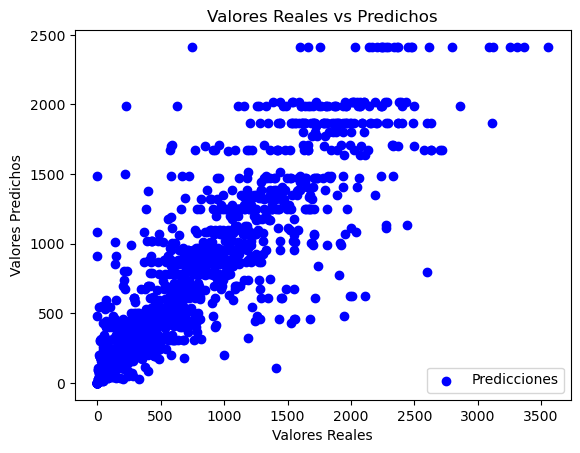

In [9]:
# Representar los datos reales vs los predichos, distinguiendo los colores según si el dato es predicho o real
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, color='blue', label='Predicciones')

plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs Predichos')
plt.legend()
plt.show()

#### Probando con SVR con Kernel RBF

In [14]:
# Entrenar el modelo de SVR con Kernel RBF
from sklearn.svm import SVR

svm_model = SVR(kernel='rbf', C=10000)
svm_model.fit(X_train, y_train)

# Evaluar el modelo SVR
y_pred_svm = svm_model.predict(X_test) 
mse_svm = mean_squared_error(y_test, y_pred_svm)
accuracy_svm = svm_model.score(X_test, y_test) 
print(f'Mean Squared Error SVR: {mse_svm}') 
print(f'Accuracy SVR: {accuracy_svm}')

Mean Squared Error SVR: 98578.15011534219
Accuracy SVR: 0.7634008393846926
